In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from math import sqrt
import time
import math

In [2]:
%matplotlib inline

In [3]:
!wget -c https://image.shutterstock.com/image-photo/blurry-zebra-crossing-silhouettes-shadows-600w-734948344.jpg -O high_contrast.jpg

--2022-03-29 11:27:00--  https://image.shutterstock.com/image-photo/blurry-zebra-crossing-silhouettes-shadows-600w-734948344.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 18.65.229.15, 18.65.229.47, 18.65.229.6, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|18.65.229.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93374 (91K) [image/jpeg]
Saving to: ‘high_contrast.jpg’

high_contrast.jpg   100%[===================>]  91.19K  --.-KB/s    in 0.1s    

2022-03-29 11:27:01 (699 KB/s) - ‘high_contrast.jpg’ saved [93374/93374]



In [4]:
!wget -c https://miro.medium.com/max/1400/1*IqNKPg7wUktQDDTbk80H3Q.jpeg -O another_contrast.jpeg

--2022-03-29 11:27:01--  https://miro.medium.com/max/1400/1*IqNKPg7wUktQDDTbk80H3Q.jpeg
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134818 (132K) [image/jpeg]
Saving to: ‘another_contrast.jpeg’

another_contrast.jp 100%[===================>] 131.66K  --.-KB/s    in 0.02s   

2022-03-29 11:27:01 (8.15 MB/s) - ‘another_contrast.jpeg’ saved [134818/134818]



In [5]:
!wget -c https://www.cyfrovychok.ua/UserFiles/Photo/43/landscape_2.jpg -O detailized.jpg

--2022-03-29 11:27:01--  https://www.cyfrovychok.ua/UserFiles/Photo/43/landscape_2.jpg
Resolving www.cyfrovychok.ua (www.cyfrovychok.ua)... 185.68.16.144, 2a00:7a60:0:1090::1
Connecting to www.cyfrovychok.ua (www.cyfrovychok.ua)|185.68.16.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123002 (120K) [image/jpeg]
Saving to: ‘detailized.jpg’

detailized.jpg      100%[===================>] 120.12K   325KB/s    in 0.4s    

2022-03-29 11:27:03 (325 KB/s) - ‘detailized.jpg’ saved [123002/123002]



In [6]:
!wget -c https://cdn.xxl.thumbs.canstockphoto.com/password-in-my-mind-drawing_csp17412096.jpg -O low_detailized.jpg

--2022-03-29 11:27:03--  https://cdn.xxl.thumbs.canstockphoto.com/password-in-my-mind-drawing_csp17412096.jpg
Resolving cdn.xxl.thumbs.canstockphoto.com (cdn.xxl.thumbs.canstockphoto.com)... 205.185.216.42, 205.185.216.10
Connecting to cdn.xxl.thumbs.canstockphoto.com (cdn.xxl.thumbs.canstockphoto.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18790 (18K) [image/jpeg]
Saving to: ‘low_detailized.jpg’

low_detailized.jpg  100%[===================>]  18.35K  --.-KB/s    in 0.001s  

2022-03-29 11:27:03 (12.7 MB/s) - ‘low_detailized.jpg’ saved [18790/18790]



In [7]:
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [8]:
high_contrast = 'high_contrast.jpg'
low_detailized = 'low_detailized.jpg'
detailized = 'detailized.jpg'
another_contrast = 'another_contrast.jpeg'

In [9]:
img1_high_contrast = cv2.imread(high_contrast)
img2_another_contrast = cv2.imread(another_contrast)
img3_low_detailized = cv2.imread(low_detailized)
img4_detailized = cv2.imread(detailized)


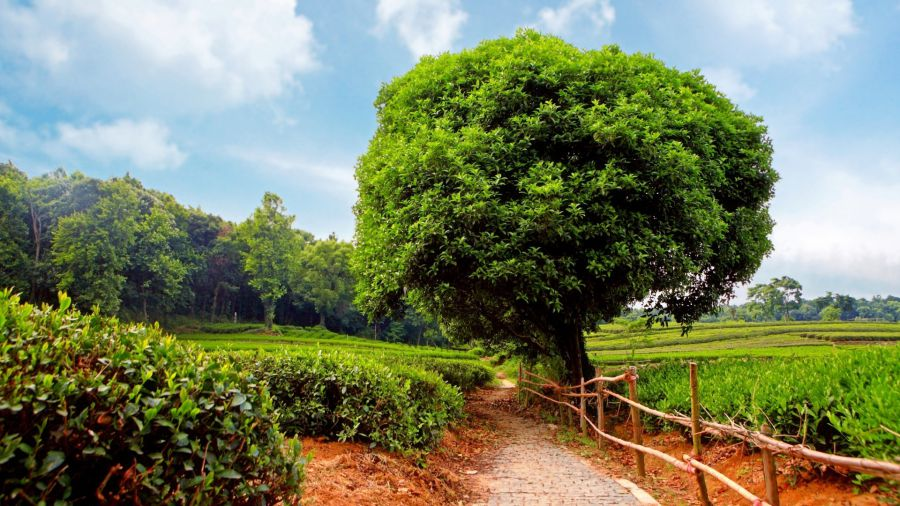

In [10]:
cv2_imshow(img4_detailized)

In [11]:
img1_high_contrast = cv2.imread(high_contrast, cv2.IMREAD_GRAYSCALE)
img2_another_contrast = cv2.imread(another_contrast, cv2.IMREAD_GRAYSCALE)
img3_low_detailized = cv2.imread(low_detailized, cv2.IMREAD_GRAYSCALE)
img4_detailized = cv2.imread(detailized, cv2.IMREAD_GRAYSCALE)


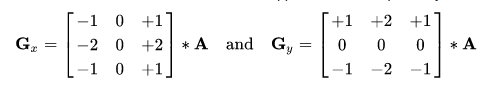

In [12]:
kernel_Sobel_operator_horizontal = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
)

kernel_Sobel_operator_vertical = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)


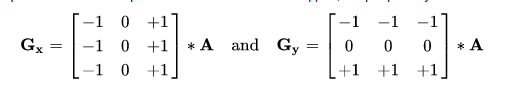


In [13]:
kernel_Prewitt_operator_horizontal = np.array(
    [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
kernel_Prewitt_operator_vertical = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [14]:
def apply_filter(image, x_filter, y_filter):
  result = np.zeros(shape=(image.shape[0], image.shape[1]), dtype=np.uint8)
  h, v = image.shape
  for row in range(1, h - 2) :
    for column in range(1, v - 2) :
      result[row, column] = np.sqrt(
          np.sum(x_filter * image[row-1: row+2, column-1: column+2])**2 +
          np.sum(y_filter * image[row-1: row+2, column-1: column+2])**2
      )
  return result


In [15]:
def plot_images_orig_and_detected(images):
  fig, axs = plt. subplots(1,3, figsize=(25, 5))
  fig.suptitle('Original - Detected Sobel - Detected Prewitt') 
  axs[0].imshow(images[0], cmap='gray')
  axs[0].set_title('Orig')
  axs[1].imshow(images[1], cmap='gray')
  axs[1].set_title('Sobel')
  axs[2].imshow(images[2], cmap='gray')
  axs[2].set_title('Prewitt')
  plt.show()

In [16]:
detected_sobel_1 = apply_filter(img2_another_contrast, kernel_Sobel_operator_horizontal, kernel_Sobel_operator_vertical)
detected_prewitt_1 = apply_filter(img2_another_contrast, kernel_Prewitt_operator_horizontal, kernel_Prewitt_operator_vertical)

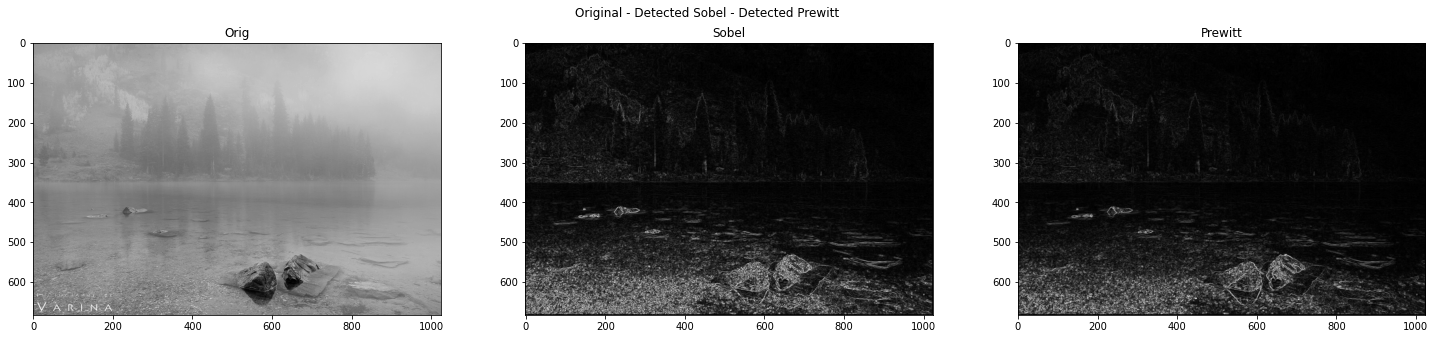

In [17]:
plot_images_orig_and_detected([img2_another_contrast, detected_sobel_1, detected_prewitt_1])

In [18]:
detected_sobel_2 = apply_filter(img1_high_contrast, kernel_Sobel_operator_horizontal, kernel_Sobel_operator_vertical)
detected_prewitt_2 = apply_filter(img1_high_contrast, kernel_Prewitt_operator_horizontal, kernel_Prewitt_operator_vertical)


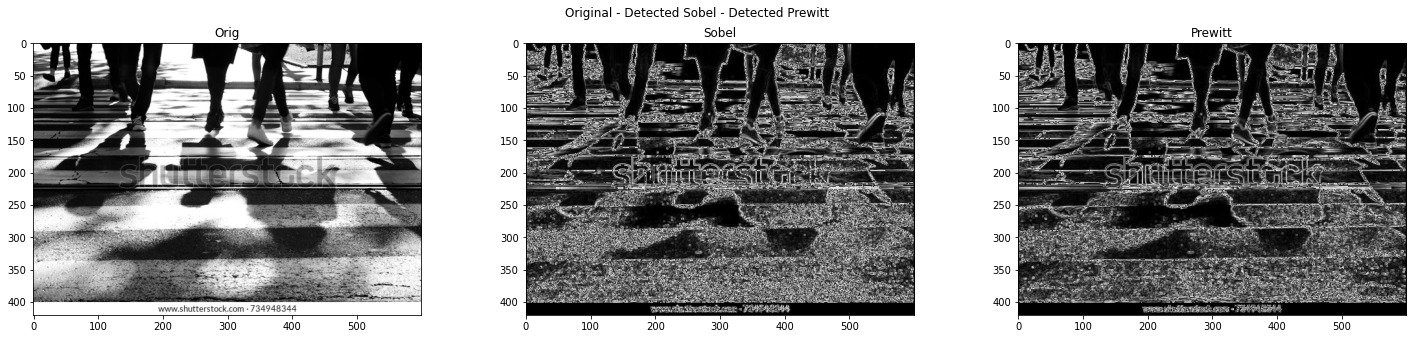

In [19]:
plot_images_orig_and_detected([img1_high_contrast, detected_sobel_2, detected_prewitt_2])

In [20]:
detected_sobel_3 = apply_filter(img3_low_detailized, kernel_Sobel_operator_horizontal, kernel_Sobel_operator_vertical)
detected_prewitt_3 = apply_filter(img3_low_detailized, kernel_Prewitt_operator_horizontal, kernel_Prewitt_operator_vertical)


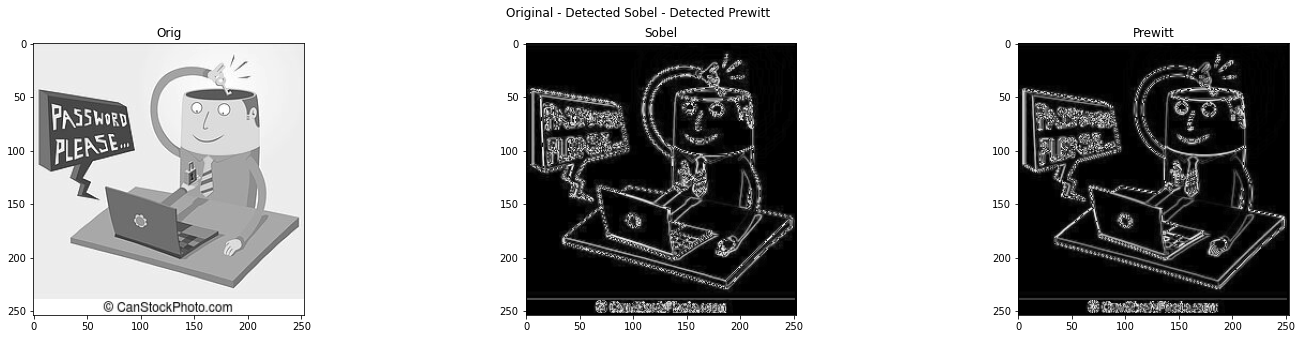

In [21]:
plot_images_orig_and_detected([img3_low_detailized, detected_sobel_3, detected_prewitt_3])

In [22]:
detected_sobel_4 = apply_filter(img4_detailized, kernel_Sobel_operator_horizontal, kernel_Sobel_operator_vertical)
detected_prewitt_4 = apply_filter(img4_detailized, kernel_Prewitt_operator_horizontal, kernel_Prewitt_operator_vertical)


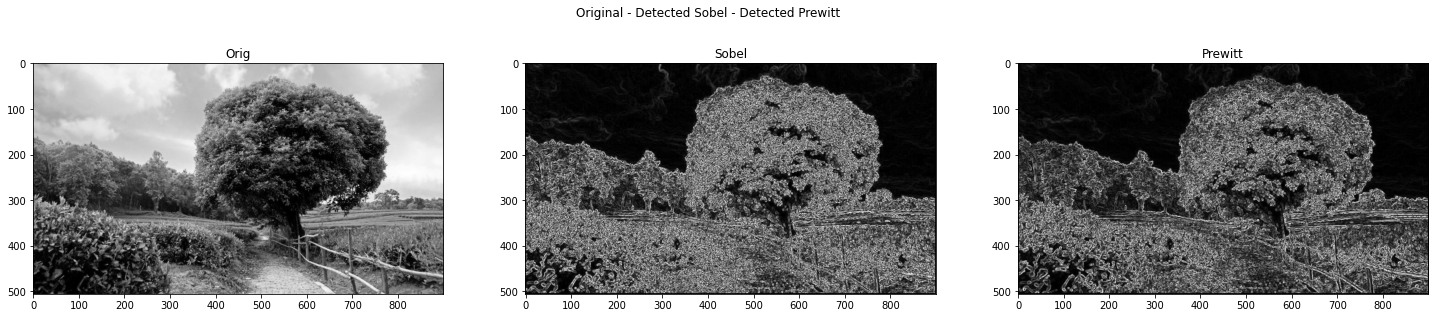

In [23]:
plot_images_orig_and_detected([img4_detailized, detected_sobel_4, detected_prewitt_4]) 

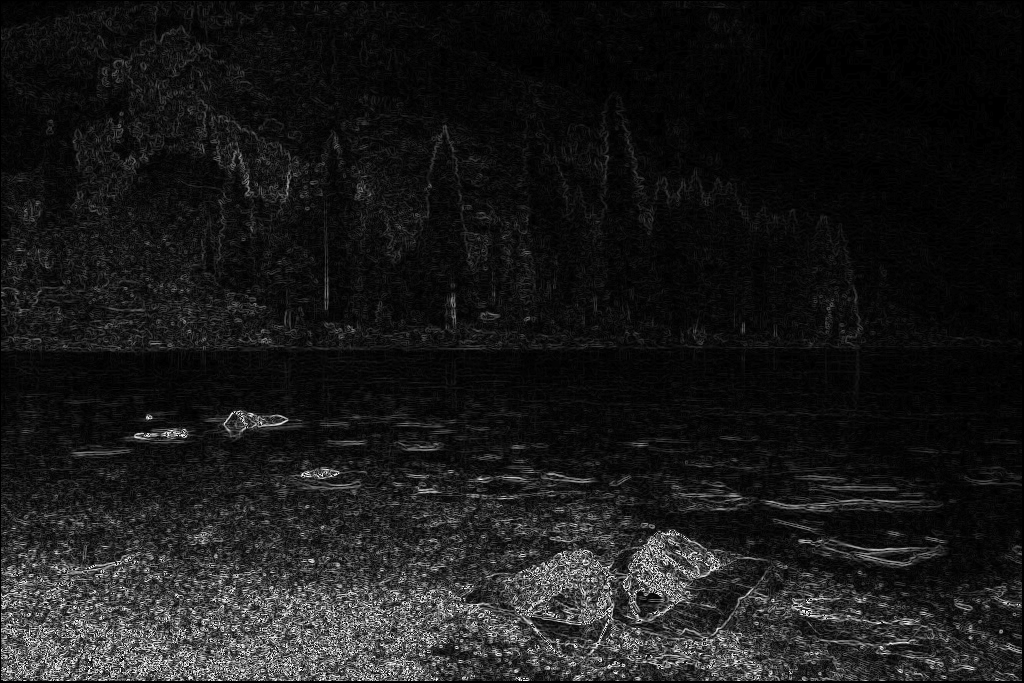

In [24]:
cv2_imshow(detected_sobel_1)

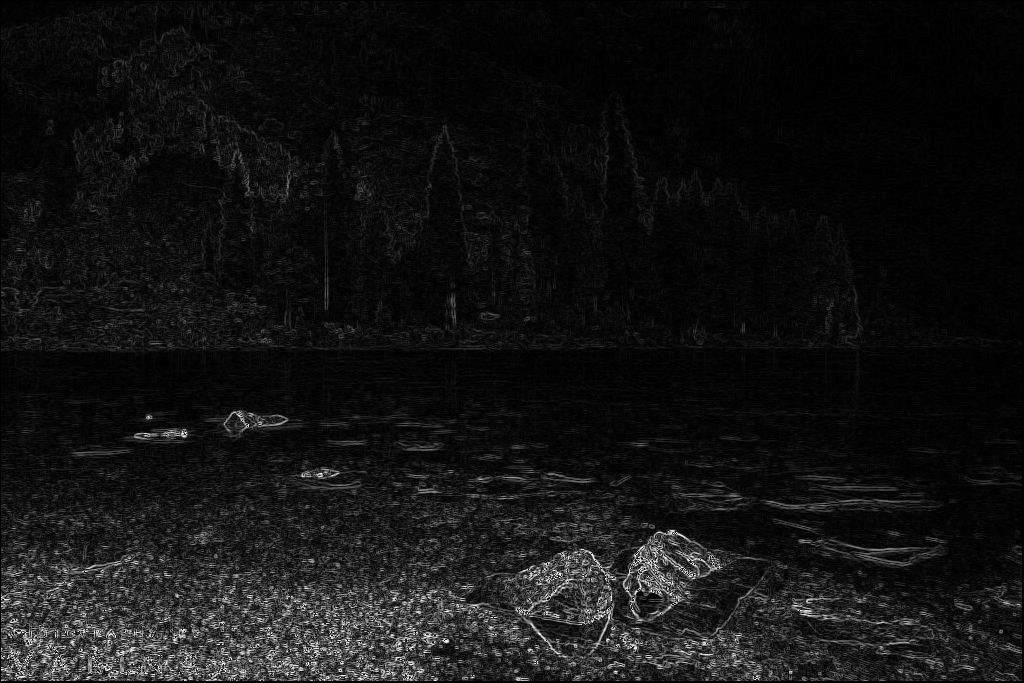

In [25]:
cv2_imshow(detected_prewitt_1)

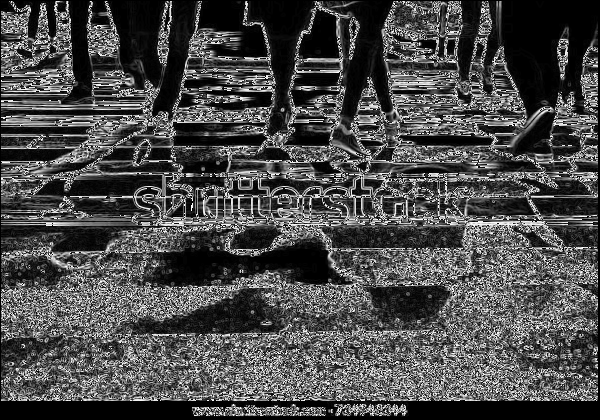

In [26]:
cv2_imshow(detected_sobel_2)

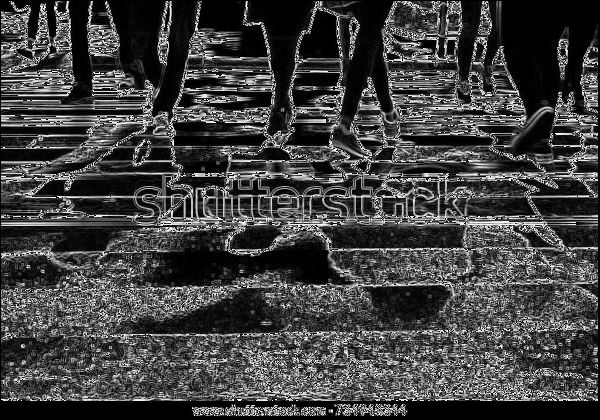

In [27]:
cv2_imshow(detected_prewitt_2)

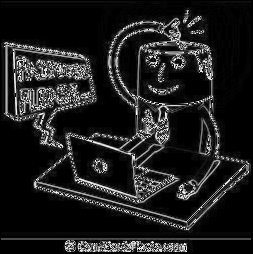

In [28]:
cv2_imshow(detected_sobel_3)

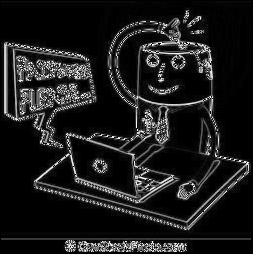

In [29]:
cv2_imshow(detected_prewitt_3)

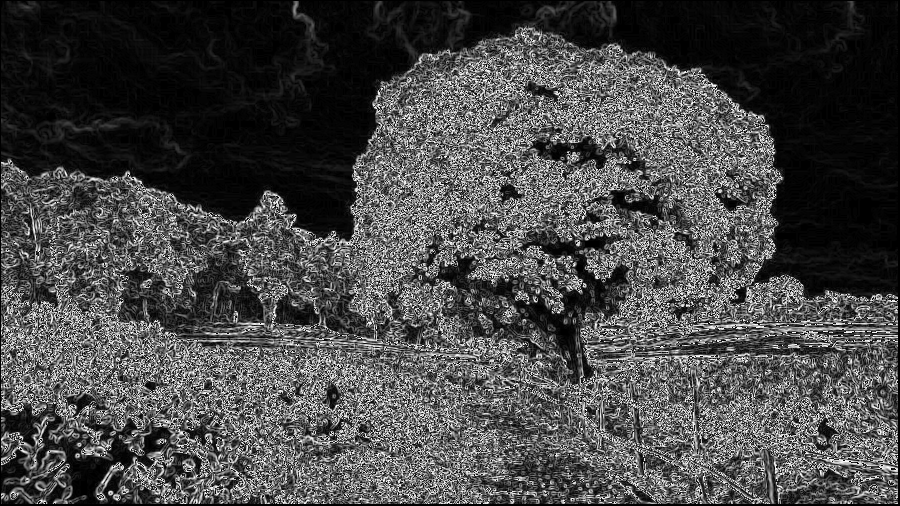

In [30]:
cv2_imshow(detected_sobel_4)

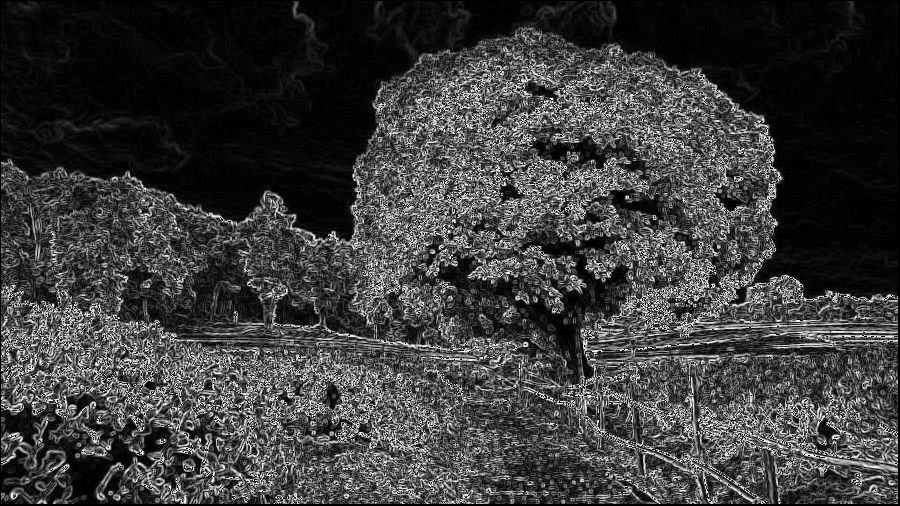

In [31]:
cv2_imshow(detected_prewitt_4)